###AI Resume vs Job Description
This notebook creates a natural language processing pipeline that:
- Compares your **Resume** to a **Job Description**
- Calculates a **match score** using vector similarity
- Identifies **missing keywords** in the resume

In [1]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [ ]:
#This can be take it as a example....this is basically the summary of a individual
resume = '''
Experienced Data Scientist with expertise in machine learning, Python, SQL, and data analysis. 
Worked on classification, NLP, and time series projects. Skilled in pandas, scikit-learn, and deep learning.
'''

job_description = '''
We are looking for a Machine Learning Engineer with skills in Python, NLP, SQL, scikit-learn, and TensorFlow. 
Experience with model evaluation and optimization is required.
'''

#Preprocessing both the texts
resume_clean = preprocess_text(resume)
jd_clean = preprocess_text(job_description)

In [ ]:
#Doing TF-IDF Vectorization
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([resume_clean, jd_clean])
similarity = cosine_similarity(vectors[0], vectors[1])[0][0]
print(f"Match Score: {similarity:.2f} (out of 1.00)")

Match Score: 0.25 (out of 1.00)


In [ ]:
resume_words = set(resume_clean.split())
jd_words = set(jd_clean.split())
missing_keywords = jd_words - resume_words
print("Suggested keywords to add to your resume:")
print(', '.join(missing_keywords))

Suggested keywords to add to your resume:
looking, engineer, model, required, tensorflow, experience, skills, optimization, evaluation


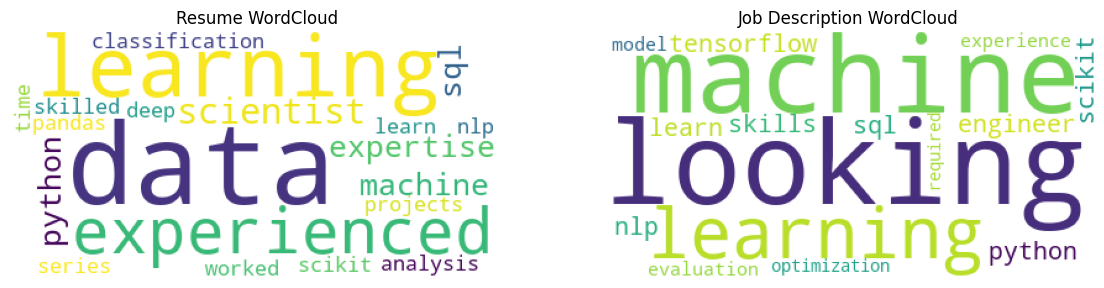

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].imshow(WordCloud(background_color='white').generate(resume_clean))
axs[0].axis('off')
axs[0].set_title('Resume WordCloud')

axs[1].imshow(WordCloud(background_color='white').generate(jd_clean))
axs[1].axis('off')
axs[1].set_title('Job Description WordCloud')
plt.show()